<a href="https://colab.research.google.com/github/vcwild/movie-recommender/blob/main/movie_recsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing a Recommender System
Let's implement a movie recommender engine from scratch by using the GroupLens Movie Database

# Setup

In [1]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip --no-check-certificate

--2020-10-31 02:15:55--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.43MB/s    in 0.2s    

2020-10-31 02:15:56 (4.43 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [2]:
!unzip ml-latest-small*

Archive:  ml-latest-small.zip
caution: filename not matched:  ml-latest-small.zip


In [3]:
!rm ml-latest-small.zip

In [4]:
import pandas as pd 

In [5]:
movies = pd.read_csv("/content/ml-latest-small/movies.csv")
movies.set_index('movieId', inplace=True)
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings = pd.read_csv("/content/ml-latest-small/ratings.csv")
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


# Recommendation System

## Recommendation based on movie ratings only

In [7]:
# define total votes
total_votes = ratings['movieId'].value_counts()
movies['total_votes'] = total_votes
movies.head()

,title,genres,total_votes
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


### Recommendation by total votes

In [8]:
movies.sort_values('total_votes', ascending=False).head(5)

,title,genres,total_votes
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [9]:
# define mean ratings
mean_ratings = ratings.groupby('movieId').mean()['rating']
movies['mean_rating'] = mean_ratings
movies.head()

,title,genres,total_votes,mean_rating
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


### Recommendation by total votes and mean rating

In [10]:
movies.sort_values(['total_votes', 'mean_rating'], ascending=False).head(5)

,title,genres,total_votes,mean_rating
movieId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446


### Recommendation by mean rating and minimum number of votes threshold

In [11]:
# select most popular movies
threshold = 50 # minimum number of voters
movies_50 =  movies.query(f'total_votes >= {threshold}').sort_values('mean_rating', ascending=False)
movies_50.head()

,title,genres,total_votes,mean_rating
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041


## User-based recommendation

In [12]:
# define movies watched by the user
watched = [1, 21, 19, 10, 11, 7, 2]
movies.loc[watched]

,title,genres,total_votes,mean_rating
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


### Recommendation based on user-defined genre and popularity

In [13]:
# select movie by genre and from the top 50
genre = 'Adventure|Children|Fantasy' # recommendation genres
search=f'genres=="{genre}"'
movies_50.query(search).sort_values('mean_rating', ascending=False)

,title,genres,total_votes,mean_rating
movieId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [14]:
# redo steps but remove movies watched by the user
movies_50\
  .drop(watched)\
  .query(search)\
  .sort_values('mean_rating', ascending=False)

,title,genres,total_votes,mean_rating
movieId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Euclidian Distance

## Search for users with similar movie interests

### Calculating the theoretical distance between 2 subjects
We'll use the absolute value for the distance between 2 subjects:
$$ abs(A-B) = abs(B-A)$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

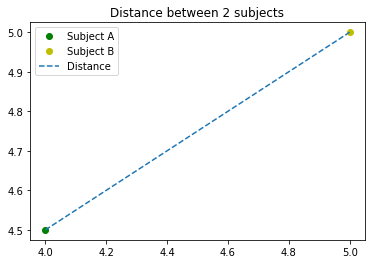

In [16]:
pos_a = np.array([4, 4.5])
pos_b = np.array([5, 5])

plt.plot(4, 4.5, 'go', label='Subject A')
plt.plot(5, 5, 'yo', label='Subject B')
plt.plot([4, 5], [4.5, 5], linestyle='--', label='Distance')
plt.legend()
plt.title('Distance between 2 subjects');

In [17]:
def distance(a,b):
  (delta_x, delta_y) = a - b
  
  return (delta_x ** 2 + delta_y ** 2) ** (1/2)

In [18]:
distance(pos_a, pos_b)

1.118033988749895

In [19]:
np.linalg.norm(pos_a - pos_b)

1.118033988749895

In [20]:
np.linalg.norm(pos_b - pos_a)

1.118033988749895

### Calculating the distance between 2 users

In [21]:
def user_ratings(user):
  user_ratings = ratings.query(f'userId=={user}')
  
  return user_ratings[['movieId', 'rating']].set_index('movieId')

### How far are users 1 and 4?


In [22]:
# define user ratings
user_1 = user_ratings(1)
user_4 = user_ratings(4)

In [23]:
compare_ratings = user_1.join(user_4, lsuffix='_1', rsuffix='_4').dropna()

In [24]:
compare_ratings.head()

,rating_1,rating_4
movieId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0


In [25]:
compare_1 = compare_ratings['rating_1']
compare_4 = compare_ratings['rating_4']

# absolute distance between 2 vectors
np.linalg.norm(compare_1 - compare_4) == np.linalg.norm(compare_4 - compare_1)

True

In [26]:
np.linalg.norm(compare_1 - compare_4)

11.135528725660043

## Define the distance between 2 users

In [27]:
def distance_between_users(id_1, id_2, min_ratings=5):
  """return a list with the absolute distance between similar entities from 2 users"""
  ratings_1 = user_ratings(id_1)
  ratings_2 = user_ratings(id_2)

  compare_ratings = ratings_1.join(ratings_2, lsuffix='_1', rsuffix='_2').dropna()

  if(len(compare_ratings) < min_ratings):
    return [id_1, id_2, 100000]

  compare_1 = compare_ratings['rating_1']
  compare_2 = compare_ratings['rating_2']
  distance = np.linalg.norm(compare_1 - compare_2)

  return [id_1, id_2, distance.round(4)]

In [28]:
distance_between_users(1, 4)

[1, 4, 11.1355]

In [29]:
def relative_distances(id):
  users = ratings['userId'].unique()
  users = users[users != id]
  distances = [distance_between_users(id, user_id) for user_id in users]

  return pd.DataFrame(distances, columns=['my_id', 'user_id', 'distance'])

In [30]:
distances_1 = relative_distances(1)

In [31]:
distances_1.query('distance==0')

,my_id,user_id,distance
75,1,77,0.0


In [32]:
def users_by_distance(id):
  distances = relative_distances(id)
  distances = distances.sort_values('distance')
  distances = distances.set_index('user_id')

  return distances

In [33]:
users_by_distance(1).head()

,my_id,distance
user_id,,
77,1,0.0000
511,1,0.5000
366,1,0.7071
258,1,1.0000
49,1,1.0000


# Testing Parameters

## Redefining the previous functions to work for a test environment

In [34]:
def single_distance_between_users(id_1, id_2, min_movies_rated=5):
  """return a list with the absolute distance between the comparison of existing movies from 2 users"""
  ratings_1 = user_ratings(id_1)
  ratings_2 = user_ratings(id_2)

  compare_ratings = ratings_1.join(ratings_2, lsuffix='_1', rsuffix='_2').dropna()

  if(len(compare_ratings) < min_movies_rated):
    return None

  compare_1 = compare_ratings['rating_1']
  compare_2 = compare_ratings['rating_2']
  distance = np.linalg.norm(compare_1 - compare_2)

  return [id_1, id_2, distance.round(4)]

In [35]:
def distances_dataframe(id, n_comparisons=None):
  """return a dataframe for all distances comparison"""
  users = ratings['userId'].unique()
  users = users[users != id]

  if n_comparisons:
    users = users[:n_comparisons]

  distances = [single_distance_between_users(id, user_id) for user_id in users]
  
  distances = list(filter(None, distances)) # remove None from distances

  return pd.DataFrame(distances, columns=['my_id', 'user_id', 'distance'])

In [36]:
def sort_users_by_distance(id, n_comparisons=None):
  """sort users by how close they are"""
  distances = distances_dataframe(id, n_comparisons)
  distances = distances.sort_values('distance')
  distances = distances.set_index('user_id')

  return distances

## Compare distance between all users, find the closest one and recommend a movie based on his suggestions

In [37]:
def recommendation_from_nearest(id, n_comparisons=None):
  """the nearest user recommends a movie for the given id"""
  my_ratings = user_ratings(id)

  similar = sort_users_by_distance(id, n_comparisons)
  most_similar = similar.iloc[0]
  most_similar_name = most_similar.name
  most_similar_ratings = user_ratings(most_similar_name)

  not_watched = most_similar_ratings.drop(my_ratings.index, errors='ignore')
  not_watched = not_watched.sort_values('rating', ascending=False)

  recommendation = not_watched.join(movies)

  return recommendation

In [38]:
recommendation_from_nearest(1).head()

,rating,title,genres,total_votes,mean_rating
movieId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


## Recommend a movie based on the mean of the k nearest users (naive kNN classifier)

In [39]:
def k_nearest(id, k=10, n_comparisons=None):
  """sort users by proximity"""
  distances = distances_dataframe(id, n_comparisons)
  distances = distances.sort_values('distance')
  distances = distances.set_index('user_id')

  return distances.head(k)

In [40]:
k_nearest(1, k=2, n_comparisons=300)

,my_id,distance
user_id,,
77,1,0.0
49,1,1.0


In [41]:
def k_nearest_recommender(id, k=10, n_comparisons=None):
  """the k nearest users recommend a movie for the given id"""
  my_ratings = user_ratings(id)

  similar = k_nearest(id, k, n_comparisons)
  similar_names = similar.index
  ratings_by_index = ratings.set_index('userId')
  similar_ratings_by_index = ratings_by_index.loc[similar_names]

  similar_mean_rating = similar_ratings_by_index.groupby('movieId').mean()[['rating']]
  recommendation = similar_mean_rating.sort_values('rating', ascending=False)

  return recommendation.join(movies)

In [42]:
k_nearest_recommender(1, k=10).head()

,rating,title,genres,total_votes,mean_rating
movieId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


# Creating a New User

## Define the new user

In [43]:
# define user watched movies and ratings
watched_movies = [122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]
watched_movies_ratings = [2, 5, 2, 5, 5, 2, 0.5, 2, 1, 1]
user_data = [list(i) for i in zip(watched_movies, watched_movies_ratings)]

In [44]:
def new_user(data):
  """create a new user and append to ratings dataframe"""
  user_id = ratings['userId'].max()+1
  user_ratings = pd.DataFrame(data, columns=['movieId', 'rating'])
  user_ratings['userId'] = user_id

  return pd.concat([ratings, user_ratings])

In [45]:
# append new user to ratings
ratings = pd.read_csv("/content/ml-latest-small/ratings.csv")
ratings = new_user(user_data)

## Recommend movies to the new user

In [46]:
k_nearest_recommender(611).head()

,rating,title,genres,total_votes,mean_rating
movieId,,,,,
171495,5.0,Cosmos,(no genres listed),2.0,4.500000
81847,5.0,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...,24.0,3.916667
1873,5.0,"Misérables, Les (1998)",Crime|Drama|Romance|War,10.0,3.750000
8014,5.0,"Spring, Summer, Fall, Winter... and Spring (Bo...",Drama,10.0,4.250000
103141,5.0,Monsters University (2013),Adventure|Animation|Comedy,16.0,3.875000


### Using movies with 50 or more votes

In [47]:
ratings = ratings.set_index('movieId').loc[movies_50.index]
ratings = ratings.reset_index()
ratings.head()

,movieId,userId,rating,timestamp
0,318,2,3.0,1.445715e+09
1,318,5,3.0,8.474349e+08
2,318,6,5.0,8.455532e+08
3,318,8,5.0,8.394635e+08
4,318,11,4.0,9.021551e+08


In [48]:
k_nearest_recommender(611).head()

,rating,title,genres,total_votes,mean_rating
movieId,,,,,
112852,5.000000,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847
74458,4.750000,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388
71535,4.666667,Zombieland (2009),Action|Comedy|Horror,53.0,3.877358
78499,4.500000,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,55.0,4.109091
2804,4.500000,"Christmas Story, A (1983)",Children|Comedy,55.0,3.972727


In [49]:
k_nearest_recommender(611, n_comparisons=300).head()

,rating,title,genres,total_votes,mean_rating
movieId,,,,,
109487,5.00,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
112852,5.00,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847
3471,5.00,Close Encounters of the Third Kind (1977),Adventure|Drama|Sci-Fi,60.0,3.741667
106782,5.00,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54.0,3.916667
74458,4.75,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388


## Create a kNN based recommendation system from movies with at least k/2 ratings and best mean between k-nearest users

In [50]:
def knn_recsys(id, k=10, n_comparisons=None):
  """the k nearest neighbors recommend a movie for the given id"""
  my_ratings = user_ratings(id)
  watched_movies = my_ratings.index

  similar = k_nearest(id, k, n_comparisons)
  similar_names = similar.index
  ratings_by_index = ratings.set_index('userId')
  similar_ratings_by_index = ratings_by_index.loc[similar_names]
  similar_grouped = similar_ratings_by_index.groupby('movieId')

  similar_mean_rating = similar_grouped.mean()[['rating']]
  similar_count = similar_grouped.count()[['rating']]
  recommendation = similar_mean_rating.join(similar_count, lsuffix='_mean', rsuffix='_count')

  min_user_rating = k/2
  filtered = recommendation.query(f'rating_count >={min_user_rating:.2f}')
  recommendation = filtered.sort_values('rating_count', ascending=False)
  recommendation_without_watched = recommendation.drop(watched_movies, errors='ignore')
  return recommendation.join(movies)

## Recommend 10 new movies to the new user

In [51]:
knn_recsys(611, k=10, n_comparisons=300).head(10)

,rating_mean,rating_count,title,genres,total_votes,mean_rating
movieId,,,,,,
5952,3.65,10,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
4993,3.80,10,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
318,4.40,10,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
356,4.50,10,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
4306,3.65,10,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,170.0,3.867647
7153,3.50,10,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
2571,4.00,10,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,3.20,10,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
6539,3.25,10,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,149.0,3.778523


In [52]:
knn_recsys(611, k=20).head(10)

,rating_mean,rating_count,title,genres,total_votes,mean_rating
movieId,,,,,,
2571,3.975000,20,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
1196,3.236842,19,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640
4993,3.921053,19,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
356,4.026316,19,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
4306,3.552632,19,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,170.0,3.867647
4226,3.947368,19,Memento (2000),Mystery|Thriller,159.0,4.122642
47,4.083333,18,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203.0,3.975369
7153,3.722222,18,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
6539,3.277778,18,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,149.0,3.778523
